# Task 5 - Text Classification
**Candidate Name:** Bathula Sai Teja  
**Date/Time:** 2025-09-27

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\punna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\punna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\punna\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Applying text preprocessing (may take a few minutes)...
Train shape: (23465, 5000)
Test shape: (5867, 5000)

Training Logistic Regression...
Logistic Regression Accuracy: 0.9888
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3829
           1       0.98      0.99      0.98      1459
           2       1.00      0.64      0.78        36
           3       0.98      0.99      0.98       543

    accuracy                           0.99      5867
   macro avg       0.99      0.90      0.94      5867
weighted avg       0.99      0.99      0.99      5867



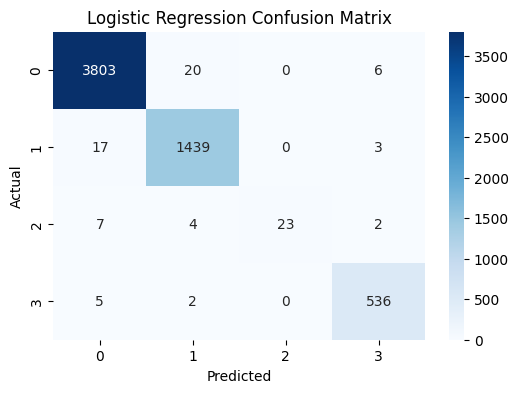


Training Multinomial Naive Bayes...
Multinomial Naive Bayes Accuracy: 0.9724
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3829
           1       0.95      0.98      0.97      1459
           2       1.00      0.22      0.36        36
           3       0.91      0.98      0.94       543

    accuracy                           0.97      5867
   macro avg       0.96      0.79      0.81      5867
weighted avg       0.97      0.97      0.97      5867



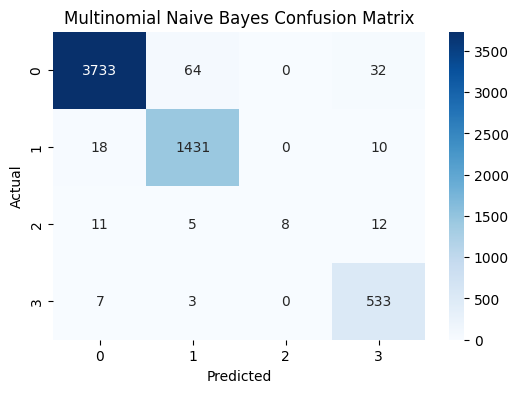


Training Linear SVM...
Linear SVM Accuracy: 0.9908
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3829
           1       0.98      0.99      0.99      1459
           2       1.00      0.67      0.80        36
           3       0.98      0.99      0.99       543

    accuracy                           0.99      5867
   macro avg       0.99      0.91      0.94      5867
weighted avg       0.99      0.99      0.99      5867



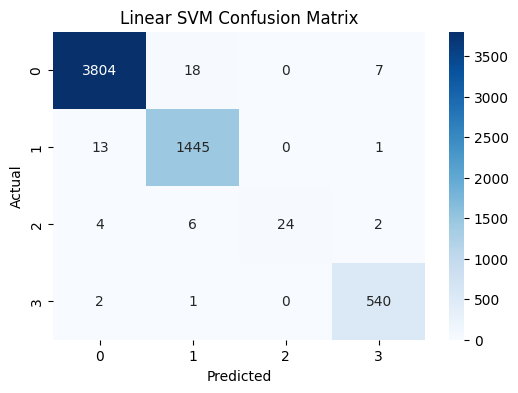


Model Accuracy Comparison:
Logistic Regression: 0.9888
Multinomial Naive Bayes: 0.9724
Linear SVM: 0.9908

Best performing model: Linear SVM


In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

# Ensure Python can find src/ modules
sys.path.append(os.path.abspath("../src"))
from preprocessing import preprocess_text   # your custom function

# -----------------------------
# 1️⃣ Load preprocessed dataset
# -----------------------------
data_path = "../data/complaints_part_0.csv"
df = pd.read_csv(data_path)

# Keep only the 4 categories
category_map = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}
df = df[df["Product"].isin(category_map.keys())]
df["label"] = df["Product"].map(category_map)

# Combine relevant columns into text
df["text"] = (
    df["Product"].astype(str) + " " +
    df["Issue"].astype(str) + " " +
    df["Consumer complaint narrative"].astype(str)
)

# -----------------------------
# 2️⃣ Text preprocessing
# -----------------------------
print("Applying text preprocessing (may take a few minutes)...")
df["clean_text"] = df["text"].astype(str).apply(preprocess_text)

# -----------------------------
# 3️⃣ Train-test split
# -----------------------------
X = df["clean_text"]
y = df["label"]

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# -----------------------------
# 4️⃣ Model training
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# -----------------------------
# 5️⃣ Compare model performance
# -----------------------------
print("\nModel Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")

best_model_name = max(results, key=results.get)
print(f"\nBest performing model: {best_model_name}")


# Task 5 - Text Classification
**Candidate Name:** Bathula Sai Teja  
**Date/Time:** 2025-09-27
